# **Credit Card Fraud Detection using SVM**

## **Requirements:**

In this practice, you will replicate the workflow from last week's credit card fraud detection task. You are required to replace the Logistic Regression (LR) model with the Support Vector Machine (SVM) model, with a focus on parameter selection and tuning.

For SVM, the large number of samples produced by oversampling can make the training process very slow. Therefore, you should only use undersampling to handle the class imbalance.

You should compare the performance of the SVM model with the [LR model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from last week’s demo, evaluating both detection capability and efficiency.

Additionally, you are expected to briefly describe the characteristics of both models, highlighting their strengths and limitations in the context of fraud detection.

### **SVM in Scikit-learn:**

Scikit-learn provides an easy-to-use implementation of Support Vector Machines via the `SVC` class. 

#### Simple usage example:

```python
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Example: SVM for binary classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier with default parameters
svm = SVC()

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
```

This simple example shows how to initialize, train, and evaluate an SVM classifier.


For more details on how to use SVM in `sklearn`, refer to the official documentation:  
[Support Vector Machine (SVM) in scikit-learn](https://scikit-learn.org/stable/modules/svm.html).

### **Deadline:** 22:00, Nov. 22nd

The practice will be checked in this lab class or the next lab class (before **Nov. 22nd**) by teachers or SAs.

### **Grading:**
* Submissions in this lab class: 1.1 points.
* Submissions on time: 1 point.
* Late submissions within 2 weeks after the deadline: 0.8 points.points.

Data source: www.kaggle.com/mlg-ulb/creditcardfraud

# The Data Science Process
<img src="./imgs/process.png"  alt="ImageFile" style="width: 600px;" align="left"/>


## 1 Modeling Task and Dataset
Anonymized credit card transactions labeled as fraudulent or genuine.
### 1.1 Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### 1.2 Dataset
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## 2 Data Preparation and Wrangling 
### 2.1 Data Preparation

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
data = pd.read_csv("creditcard.csv")
# data.head()

The DataFrames object has a method called info(), that gives you more information about the data set.

In [4]:
# data.info()

**Result Explained**
The result tells us there are 284807 rows and 31 columns, and the name of each column, with the data type.
The info() method also tells us how many Non-Null values there are present in each column, and in our data set it seems like there are 284807 of 284807 Non-Null values in all columns.
Which means that there are no Null values in our data set.


Empty values, or Null values, can be bad when analyzing data, and you should consider removing rows with empty values. This is a step towards what is called cleaning data.

### 2.2 Data Wrangling


#### 2.2.1 Incompleteness

Empty cells can potentially give you a wrong result when you analyze data.
If empty cells found, there are several ways to deal with:
-remove rows that contain empty cells
-insert a new value(Using some specified value，Mean, Median, or Mode) instead of the empty value

In [5]:
for i in range(data.shape[1]):
    n_miss = data.iloc[:,i].isnull().sum()
    # print(f'There are {n_miss} missing values in column {i}.')

**Result Explained** The result tell us there are no empty cell in the data set.

#### 2.2.1 Duplication
Duplicate rows are rows that have been registered more than one time.
To discover duplicates, we can use the duplicated() method.

The duplicated() method returns a Boolean values for each row:

In [6]:
# print(data.duplicated())

In [7]:
data.duplicated().sum()

1081

In [8]:
# data[data.duplicated()]

## 3 Exploration Data Analysis

**DataFrame.describe()**

Generate descriptive statistics.Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [9]:
# data.describe()

In [10]:
count_classes = pd.value_counts(data['Class'], sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

In [11]:
print("0:", (data['Class']==0).sum())
print("1:", (data['Class']==1).sum())

0: 284315
1: 492


**Result Explained** The histogram and above output tell us the dataset is highly unbalanced.

In [12]:
# data['Amount']

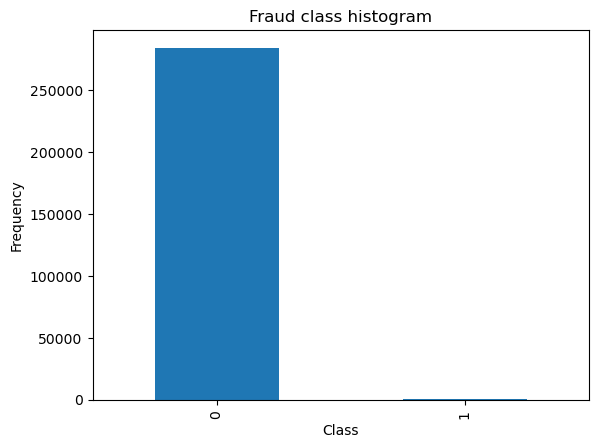

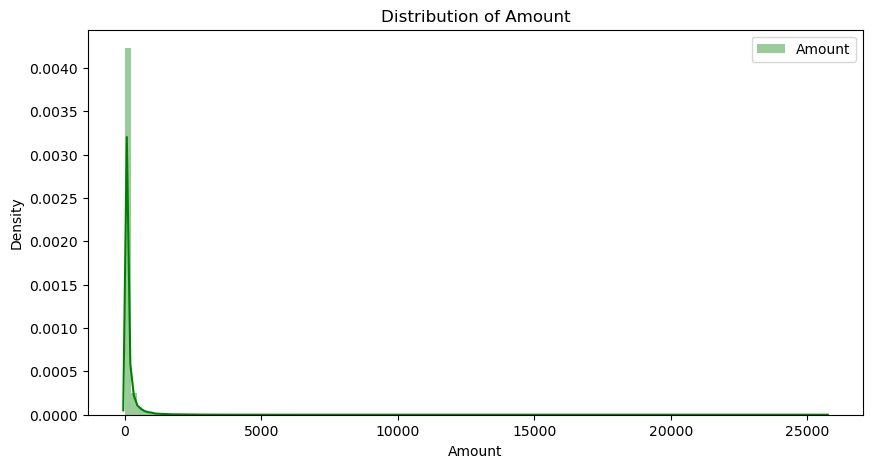

In [13]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns


data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

# Distribution of Amount
plt.figure(figsize=(10,5))
plt.title('Distribution of Amount')
sns.distplot(data['Amount'], color='green', kde=True, bins=120, label='Amount')
plt.legend()
plt.show()

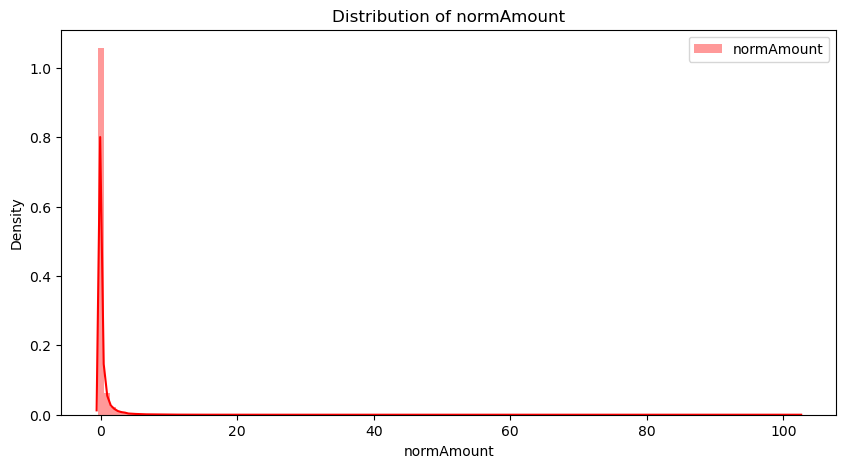

In [14]:
# Distribution of normAmount

plt.figure(figsize=(10,5))
plt.title('Distribution of normAmount')
sns.distplot(data['normAmount'], color='red', kde=True, bins=120, label='normAmount')
plt.legend()
plt.show()

In [15]:
data = data.drop(['Time','Amount'], axis=1)
# data.head()

**Result Explained** 

**sklearn.preprocessing.StandardScaler**
Class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)
Standardize features by removing the mean and scaling to unit variance. 
The standard score of a sample x is calculated as:
z = (x - u) / s 
where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

**fit_transform(X)** returns a transformed version of X

**'Amount'** column has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler


In [16]:
# data.describe()

**Undersampling** is a technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class.

In [17]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)
print("number_records_fraud: ", number_records_fraud)

# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

# Out of the indices we picked, randomly select "x" number 
#The number of normal records picked = number_records_fraud
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

number_records_fraud:  492
Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


## 4 Modeling 
### Training and Testing
<img src="./imgs/modeling.png"  alt="ImageFile" style="width: 600px;" align="left"/>


### Train, Validation and Test
<img src="./imgs/dataset1.png"  alt="ImageFile" style="width: 600px;" align="left"/>
<img src="./imgs/dataset2.png"  alt="ImageFile" style="width: 600px;" align="left"/>


### K-fold Cross Validation
<img src="./imgs/k_fold.PNG"  alt="ImageFile" style="width: 600px;" align="left"/>

In [18]:
from sklearn.model_selection import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# print("Number transactions train dataset: ", len(X_train))
# print("Number transactions test dataset: ", len(X_test))
# print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))


Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


### Confusion matrix
<img src="./imgs/Confusion_matrix.png"  alt="ImageFile" style="width: 600px;" align="left"/>

### Evaluation metrics
<img src="./imgs/Evaluation_metrics.png"  alt="ImageFile" style="width: 600px;" align="left"/>

In [19]:
#Recall = TP/(TP+FN)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report 
from sklearn.svm import SVC

In [20]:
C_values = [0.01, 0.1, 1, 10, 100]
best_accuracy = 0
best_C = None
accuracies = []

for C in C_values:
    svm = SVC(C=C, kernel='linear', probability=True, random_state=123)
    svm.fit(X_train_undersample, y_train_undersample.values.ravel())
    
    y_pred = svm.predict(X_test_undersample.values)
    
    accuracy = recall_score(y_test_undersample, y_pred)
    accuracies.append(accuracy)
    
    print(f"C: {C}, Accuracy: {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = C

print(f"\nBest C value: {best_C} with accuracy: {best_accuracy:.4f}")


C: 0.01, Accuracy: 0.8912
C: 0.1, Accuracy: 0.9252
C: 1, Accuracy: 0.9320
C: 10, Accuracy: 0.9320
C: 100, Accuracy: 0.9252

Best C value: 1 with accuracy: 0.9320


In [21]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.9319727891156463


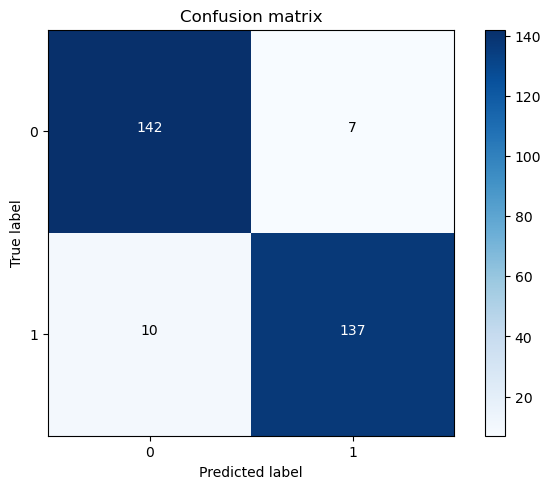

In [22]:
# X_test_undersample
import itertools
svm_best = SVC(C=best_C, kernel='linear', probability=True, random_state=123)
svm_best.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_best = svm_best.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample, y_pred_best)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()



## 5 Visualization

In [23]:
# lr = LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear')
# lr.fit(X_train_undersample,y_train_undersample.values.ravel())
# y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

# thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# plt.figure(figsize=(10,10))

# j = 1
# for i in thresholds:
#     y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
#     plt.subplot(3,3,j)
#     j += 1
    
#     # Compute confusion matrix
#     cnf_matrix = confusion_matrix(y_test_undersample, y_test_predictions_high_recall)
#     np.set_printoptions(precision=2)

#     print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

#     # Plot non-normalized confusion matrix
#     class_names = [0,1]
#     plot_confusion_matrix(cnf_matrix
#                           , classes=class_names
#                           , title='Threshold >= %s'%i) 